### FRAUD DETECTION MODEL

#### The problem: 

Blossom Bank is a multinational financial services group, that offers a variety of financial products, headquartered in London,UK. Blossom Bank has recently deetcted some fraudulent transactions through their data.  In a bid to  actualise future fradulent transactions, there would be a need for a Machine Learning model to be established. 

#### The benefit: 

1) The product would drastcially reduce the amount of fradulent transactions 

2) The product would give the its users more publicity in their service offerings due to lower fradulent related complaints. 

3) To know how much fradulent transactions occur in the particular time frame

4) The model would allow the bank to be seen as a safe heaven. 


#### Data dictionary

- step: represents a unit of time where 1 step equals 1 hour

- type: type of online transaction

- amount: the amount of the transaction

- nameOrig: customer starting the transaction

- oldbalanceOrg: balance before the transaction

- newbalanceOrig: balance after the transaction

- nameDest: recipient of the transaction

- oldbalanceDest: initial balance of recipient before the transaction

- newbalanceDest: the new balance of the recipient after the transaction

- isFraud: fraud transaction

#### Import libaries for data inspection and exploratory data analysis.

In [1]:
# import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

# import other libraries....
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
# load the data 

# the semi-colon is specified in separator because the data file uses semi-colons for delimiters

data = pd.read_csv('OPFD.csv', sep=',', header= 0)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


#### Data Inspection

In [3]:
# Presents the data structure of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
# Provides the number of rows and columns

data.shape

(1048575, 10)

In [5]:
# describes the dataset

data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [6]:
# Check the percentage of transactions to confirm how much fradulent transactions occured 

data.isFraud.value_counts(normalize=True)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

In [7]:
#checks for NaN values, if true then there are NaN values

data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool

In [8]:
# To check the various type of account transaction

data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
# To check all the verious steps within the dataset

data['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)

In [56]:
# convert isfraud from int to str

data.isFraud.replace(1, 'Fraud', inplace=True)
data.isFraud.replace(0, 'Not Fraud', inplace=True)

In [11]:
# To check the total trasnactions that were fraudulent and those that were not

data['isFraud'].value_counts()

Not Fraud    1047433
Fraud           1142
Name: isFraud, dtype: int64

In [57]:
# create a function to segment customers into classes

def cust(x):

    if x >= 5000000: 
        return 'S'
    elif x >= 1000000:
        return 'A'
    elif x >= 100000: 
        return 'B'
    elif x >= 10000:
        return 'C'
    elif x >= 1000:
        return 'D'
    else:
        return 'E'
    
data['cust_group'] = data['amount'].apply(cust)

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,cust_group
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Not Fraud,D
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Not Fraud,D
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,E
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,E
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Not Fraud,C


In [58]:
# create a function to group the step into days
def hour(step):
    if step <= 24:
        return "1-day"
    elif step <=48:
        return "2-days"
    elif step <=72:
        return "3-days"
    else: 
        return "4-days"

    
# Create a new column for daily rate of steps
data["days"] = data["step"].apply(hour)

data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,cust_group,days
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,Not Fraud,D,1-day
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,Not Fraud,D,1-day
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,E,1-day
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,E,1-day
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,Not Fraud,C,1-day
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,Not Fraud,B,4-days
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,Not Fraud,D,4-days
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,Not Fraud,C,4-days
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,Not Fraud,C,4-days


In [14]:
data['cust_group'].value_counts()

B    454704
C    349444
D    201690
E     24832
A     17819
S        86
Name: cust_group, dtype: int64

#### Exploratory Data Analysis 

Gather insights of the data through visuals. 

Text(0, 0.5, 'count of type')

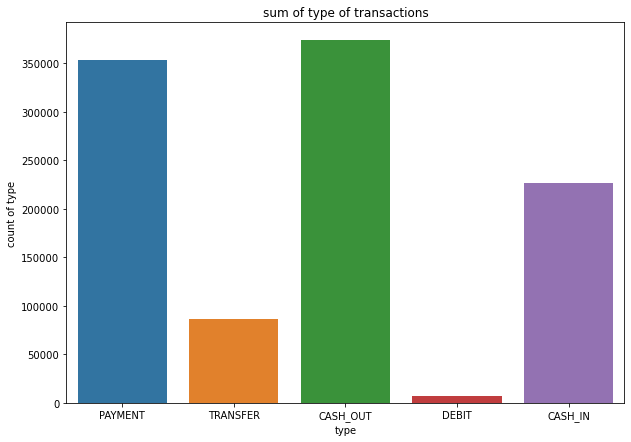

In [15]:
# Graph which highlights the most type of transactions

plt.figure(figsize=(10,7))
plt.title('sum of type of transactions')
sns.countplot(x='type', data=data)

plt.xlabel('type')
plt.ylabel('count of type')

- From the chart above, it can be deduced that transactions mostly occur when money is leaving an account and less when money is entering an account

Text(0.5, 1.0, 'Duration of Transaction')

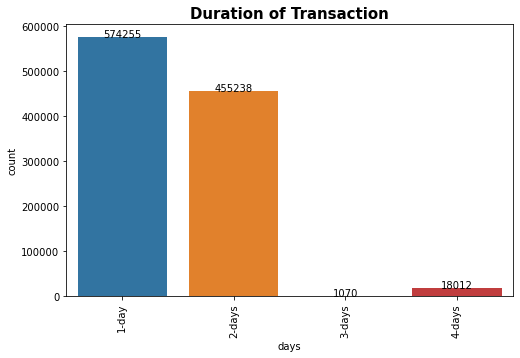

In [16]:
# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "days", data = data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Duration of Transaction', weight='bold', fontsize=15)

- The graph above shows that majority of trasnactions occured within 24 hours while the least transactions occured within 42 days

Text(0, 0.5, 'count of customer in group')

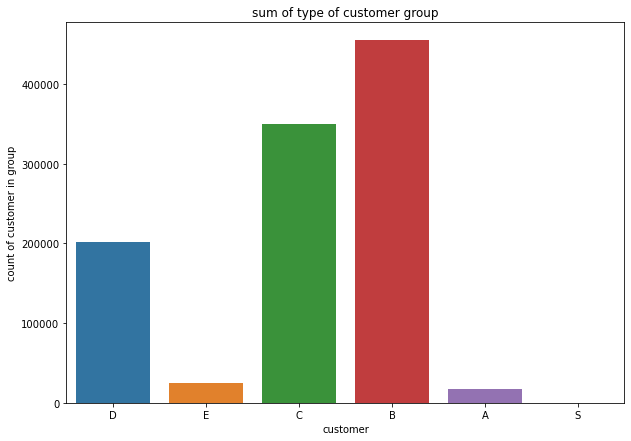

In [17]:
# Graph which highlights the group customers engaging the most in transactions

plt.figure(figsize=(10,7))
plt.title('sum of type of customer group')
sns.countplot(x='cust_group', data=data)

plt.xlabel('customer')
plt.ylabel('count of customer in group')

- From the graph above, majority of the customers who conducted transactions within the bank have a balance between 100,000 and 10,000 while the least transactions had more than 5,000,000 in their account.

<AxesSubplot:title={'center':'type of transaction by customer group'}, xlabel='cust_group', ylabel='count'>

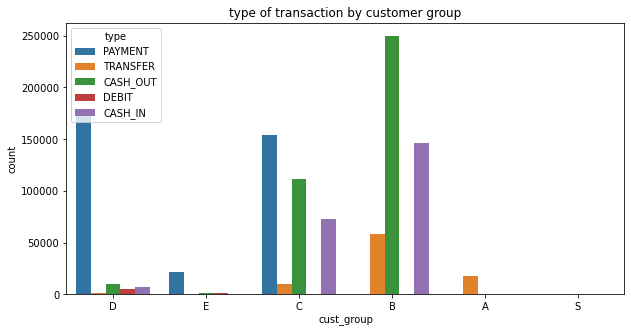

In [59]:
# Graph showing if customer group has an effect on type of transactions

plt.figure(figsize=(10,5))
plt.title('type of transaction by customer group')
sns.countplot(x='cust_group', data=data, hue='type')

From the graph abpve it can be established that customer group B conducts the most transactions while customer group D which had the least balances had the most payments. 

Customer group B had the most amount of cash withdrawals, transfers and cash deposits. 

The customer group S had the least amount of transactions. 

It can be established that customer group B are the bank's most active customers

<AxesSubplot:xlabel='step', ylabel='amount'>

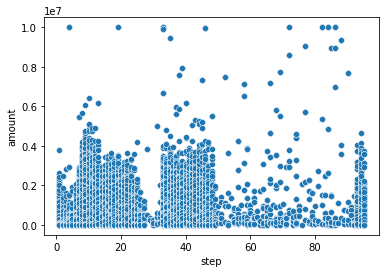

In [63]:
# Graph showing the relationship between step and amount

sns.scatterplot(x=data['step'], y=data ['amount'])

From the graph above, the following can be deduced:
- Majority of transactions were between 0 - 4 million and they had between 0 - 24 and 32 - 47 hours
- The least transactions were > greater than 9 million
- Transactions greater than 5 million usually took up to 40 hours    

<AxesSubplot:title={'center':'type of transaction by customer group'}, xlabel='cust_group', ylabel='count'>

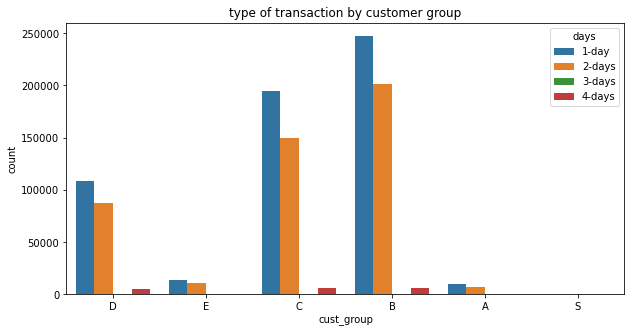

In [64]:
# Graph showing if customer group has an effect on type of transactions

plt.figure(figsize=(10,5))
plt.title('type of transaction by customer group')
sns.countplot(x='cust_group', data=data, hue='days')

From the graph above, Majority of transactions amongst the customer group usually take between 1 and 2 days. Furthermore, it is very rare that these transactions take more than 3 days

<AxesSubplot:>

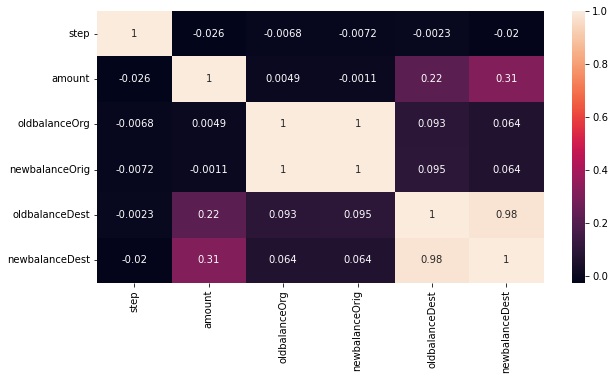

In [19]:
# Graph showing the various relationships established within the model.

plt.figure(figsize=(10,5))
corel = data.corr()
sns.heatmap(corel,annot=True)

- There is a high positive correlation between new_bal_recipient and old_bal_recipient.
- There is a low positive correlation between new_bal_recipient and amount, and also between old_bal_recipient and amount.
- There is a very low positive correlation between isFraud and amount

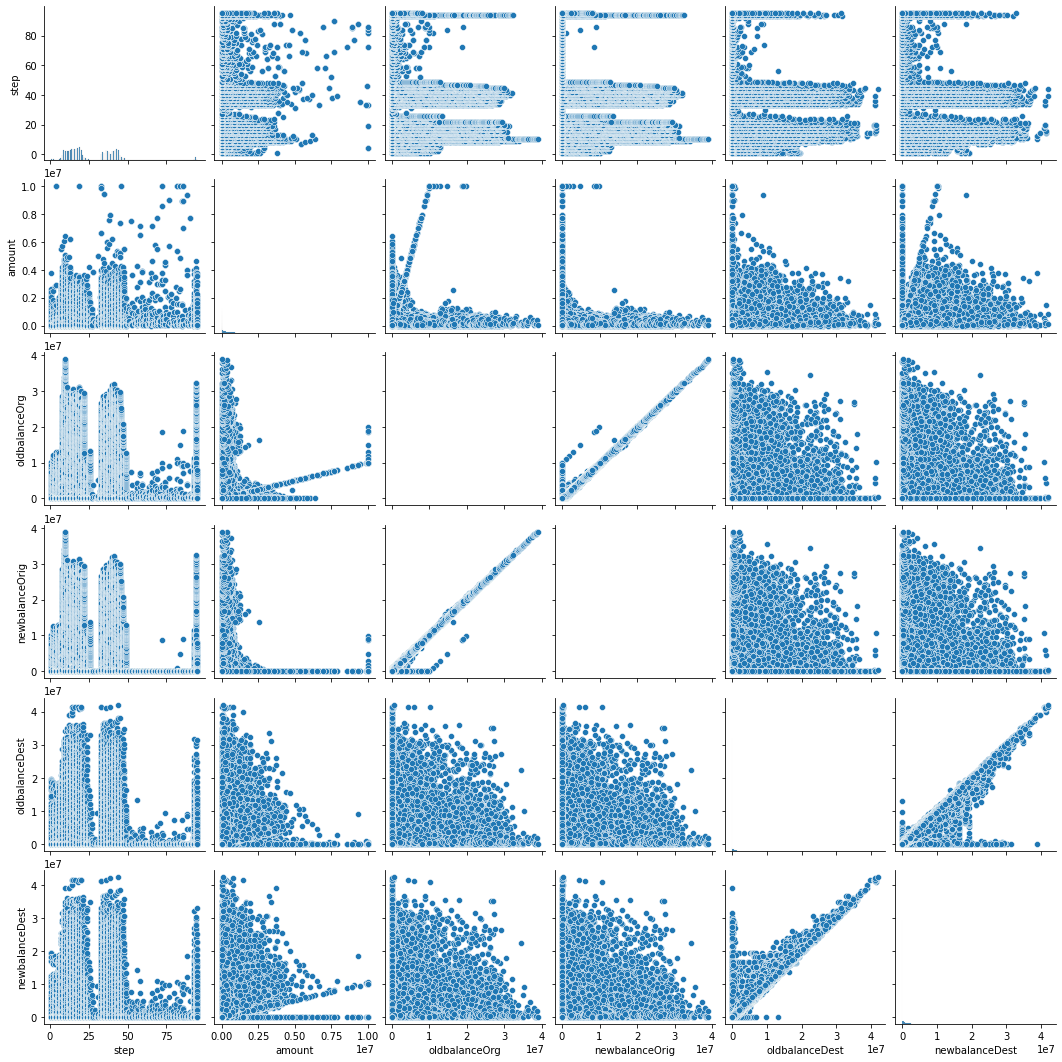

In [20]:
# visualize all the numerical plots

sns.pairplot(data)

<AxesSubplot:xlabel='step', ylabel='Count'>

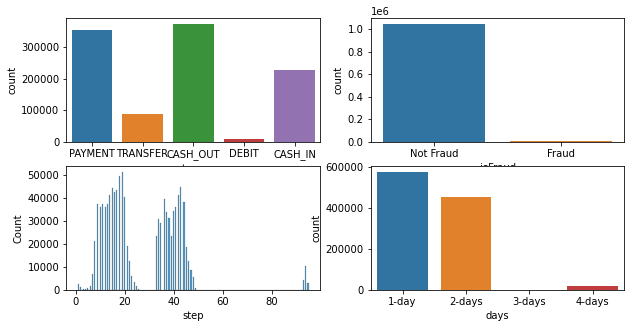

In [69]:
# For other univariate analysis, we will create subplots


fig, axes = plt.subplots(2,2, figsize=(10,5))

# Categorical variables
sns.countplot(x='type', data=data, ax=axes[0,0])
sns.countplot(x='isFraud', data=data, ax=axes[0,1])
sns.countplot(x='days', data=data, ax=axes[1,1])

# Numerical variables
sns.histplot(x='step', data=data, ax=axes[1,0])

#### Feature Engineering

In [21]:
# remove the days column

del data['days']

In [22]:
# remove the days column

del data['cust_group']

In [23]:
# check the dataset

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Not Fraud


In [24]:
# label isFraud as y 

data = data.rename(columns = {"isFraud":"y"})

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,y
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Not Fraud


In [27]:
# select categorical variables

categorical = ['type']
categorical

['type']

In [28]:
# use pd.get_dummies() for one hot encoding

categories_dumies = pd.get_dummies(data[categorical])
categories_dumies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [29]:
# use pd.concat() to merge the hot one coding to the original data

data = pd.concat([data,categories_dumies],axis=1)
print (data.shape)

(1048575, 15)


In [30]:
# check the data

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,y,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Not Fraud,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Not Fraud,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Not Fraud,0,0,0,1,0


In [31]:
# remove the initial categorical columns now that we have encoded them

data = data.drop(categorical, axis=1)

In [32]:
# check the new shape

data.shape

(1048575, 14)

In [33]:
# define categorical_2 for unnecessary columns

categorical_2 = ['nameOrig','nameDest']

In [34]:
# drop categorical_2

data = data.drop(categorical_2,axis=1)

In [35]:
# check the dataset

data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,y,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,Not Fraud,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,Not Fraud,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,Fraud,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,Not Fraud,0,0,0,1,0


#### Select Features

In [36]:
#define bith y and x and select new values

y = data.y
X = data.drop('y', axis = 1)

In [37]:
# check the newly defined X

X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [38]:
# check the newly defined y

y.head()

0    Not Fraud
1    Not Fraud
2        Fraud
3        Fraud
4    Not Fraud
Name: y, dtype: object

#### Train Test Split

In [39]:
#import the libraries we will need

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import seaborn as sns

In [40]:
#split into training and validation sets using a 40% split ratio

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

In [41]:
#initialize the models and create list of your model names

LR=LogisticRegression()
KN=KNeighborsClassifier()
DC=DecisionTreeClassifier()
RF=RandomForestClassifier()

models = [LR, KN, DC, RF]

Import ML algorithms and initialize them

In [42]:
from sklearn import metrics

def cm_plt (y_valid,prediction):
    cm = metrics.confusion_matrix(y_valid,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm,
    cmap='Blues',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [43]:
#define a function which would be used to train the model

def trainer (model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)
    
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    
    print(classification_report(y_valid,prediction))
    
    cm_plt (y_valid,prediction)

#### Train the model


For LogisticRegression, Accuracy score is 0.9990725508428104 

              precision    recall  f1-score   support

       Fraud       0.59      0.37      0.45       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.79      0.68      0.73    419430
weighted avg       1.00      1.00      1.00    419430



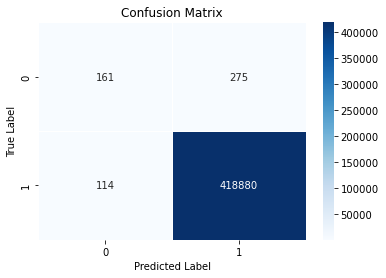


For KNeighborsClassifier, Accuracy score is 0.9993729585389696 

              precision    recall  f1-score   support

       Fraud       0.76      0.58      0.66       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.88      0.79      0.83    419430
weighted avg       1.00      1.00      1.00    419430



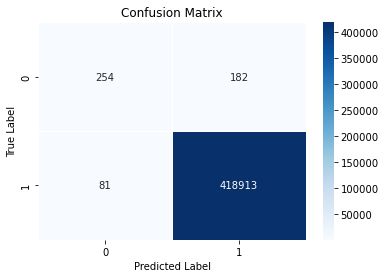


For DecisionTreeClassifier, Accuracy score is 0.9995517726438261 

              precision    recall  f1-score   support

       Fraud       0.76      0.82      0.79       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.88      0.91      0.90    419430
weighted avg       1.00      1.00      1.00    419430



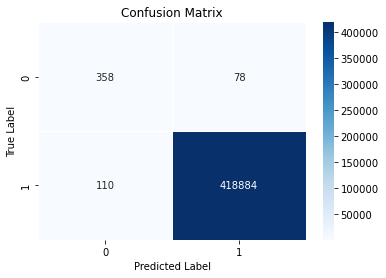


For RandomForestClassifier, Accuracy score is 0.9998021123906253 

              precision    recall  f1-score   support

       Fraud       0.99      0.82      0.90       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.99      0.91      0.95    419430
weighted avg       1.00      1.00      1.00    419430



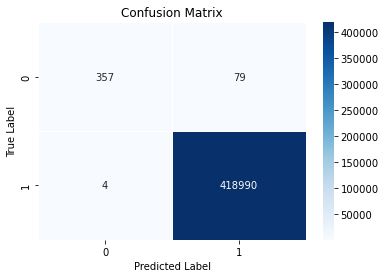

In [44]:
#print the model

for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)

#### Accuracy, Precision and Recall Definition

- The values provided are 1s and 0s
- The 0s highlights the model's capability to predict trasnacactions that are not fradulent
- The 1s highlights the model's capability to predict trasnactions which are fradulent

    With regards to accuracy, it is a mesure which tells us how often our model is correct. Because accuracy alone is not sufficient for evaluation,  precision and recall are also considered

    With regards to precision, it is a measure of the probability that our model is able to accurately predict fraudulent transactions. Precision is how good the model is at predicting a specific category. It is the quality of a positive prediction made by the model. 

    Recall on the other hand, is considered when you have to correctly predict an event that has occured already. Recall tells you how many times the model was able to detect a specific category. It measures the model’s ability to detect Positive predictions.

#### Result Interpretation

- In a bid to establish which model would be the most effective in dedecting the fraudulent transactions, we consider their accuracy, precision and recall. 


- In terms of accuracy, the RandomForest Classifier is at 99.98% which means that it would have 418,990 of the sample predicition correct. It was the model with the highest accuracy.  


- In terms of precision, the RandomForest Classifier was also the model with the highest score with 99%. 


- In terms of recall, the RandomForest Classifier was again the model with the highest score with 82%.


- Because of the consistency in being the model with the highest accuracy, precision and recall scores, the RandomForest Classifier is the most suitable model for dedecting fraudulent transactions.

#### Model Cross-Validation using K-Fold

In [50]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [52]:
def trainer_mcv(model,X,y):
    score = ["accuracy", "precision", "recall"]
    scores = cross_val_score(model, X, y, scoring='score', cv=cv, n_jobs=-1)
    print('Model Accuracy: %.3f' % (mean(scores)))
    print(classification_report(y_test,prediction))
    cm_plt(y_test,prediction)


For LogisticRegression, Accuracy score is 0.9990725508428104 

              precision    recall  f1-score   support

       Fraud       0.59      0.37      0.45       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.79      0.68      0.73    419430
weighted avg       1.00      1.00      1.00    419430



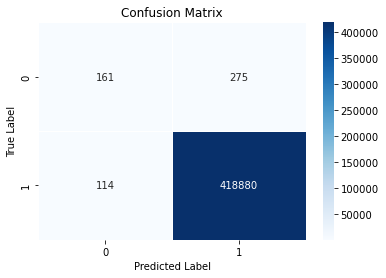


For KNeighborsClassifier, Accuracy score is 0.9993729585389696 

              precision    recall  f1-score   support

       Fraud       0.76      0.58      0.66       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.88      0.79      0.83    419430
weighted avg       1.00      1.00      1.00    419430



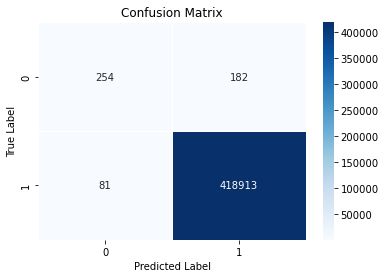


For DecisionTreeClassifier, Accuracy score is 0.9995803829006032 

              precision    recall  f1-score   support

       Fraud       0.78      0.83      0.80       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.89      0.91      0.90    419430
weighted avg       1.00      1.00      1.00    419430



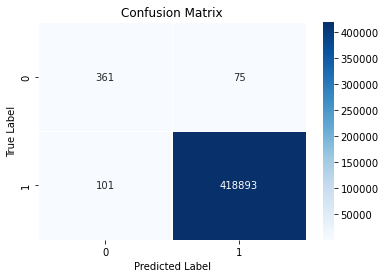


For RandomForestClassifier, Accuracy score is 0.9997878072622368 

              precision    recall  f1-score   support

       Fraud       0.99      0.81      0.89       436
   Not Fraud       1.00      1.00      1.00    418994

    accuracy                           1.00    419430
   macro avg       0.99      0.90      0.94    419430
weighted avg       1.00      1.00      1.00    419430



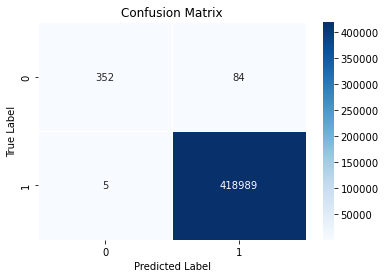

In [53]:
for model in models:
    trainer(model,X_train,y_train, X_valid,y_valid)

#### Interpretation

Like in the first set of results, the RandomForest Classifier has the highest accuracy, precision and recall score. These scores remain constant in both evaluations and this is a good sign of the reliability of our model.

Recall would be the most imprtant metric for choosing the right model because as our problem definition hints, we need to be as accurate as possible to ensure our customer funds are highly secured. This means we must consider all relevant factors and this is what Recall does.

#### Conclusion

Because the RandomForest Classifier has the highest accuracy, it should be established within the bank through the engineering team. The next steps would be to deploy the model into the bank's algothrithm. 

In a bid for conveniency the engineering team could automate the model. The dedection would be accurate because through the cross evaluation conducted it has been realized that the model would be able to accurately dedect fraudulent transactions when given new datasets. 

The bank would heavily benefit from integrating this model because the risk of customer's accounts on fraudsters would be reduced thereby giving them more publicity as a safe heaven. 